In [1]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 加载数据集

In [2]:
data_dir = 'u.data' 
N, M, data_list, _ = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


### 分割数据集

In [3]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 将 list 转换成 矩阵

In [4]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

### 参数设置

In [5]:
users_num = N            #用户数
items_num = M            #商品数
hidden_size = 500        #隐层节点数目，即用户的嵌入空间维度
batch_size = 256         #batch大小
lamda_regularizer = 1e-3 #正则项系数
learning_rate = 1e-3  #学习率
epoches  = 100
embedding_size = 8

### 5. CDAE
- 基于用户

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
epoch:0  loss=47.9414; 
 MAE=2.0558; RMSE=2.3325; Recall=0.0141; Precision=0.0300
epoch:10  loss=10.1467; 
 MAE=2.6105; RMSE=2.8876; Recall=0.0452; Precision=0.0958
epoch:20  loss=9.0462; 
 MAE=2.8992; RMSE=3.1656; Recall=0.0507; Precision=0.1074
epoch:30  loss=8.8116; 
 MAE=2.9280; RMSE=3.1951; Recall=0.0502; Precision=0.1065
epoch:40  loss=8.4502; 
 MAE=2.9207; RMSE=3.1877; Recall=0.0490; Precision=0.1038
epoch:50  loss=8.7552; 
 MAE=2.9381; RMSE=3.2056; Recall=0.0524; Precision=0.1111
epoch:60  loss=8.6448; 
 MAE=2.9319; RMSE=3.2004; Recall=0.0527; Precision=0.1119
epoch:70  loss=8.8082

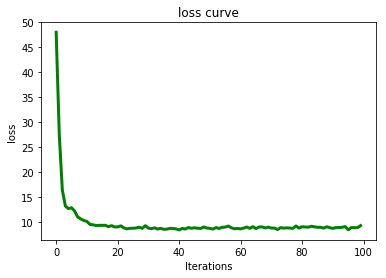

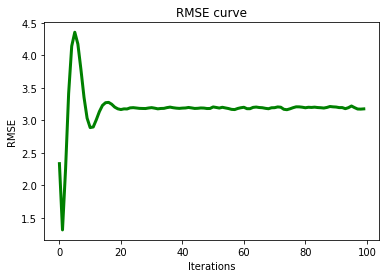

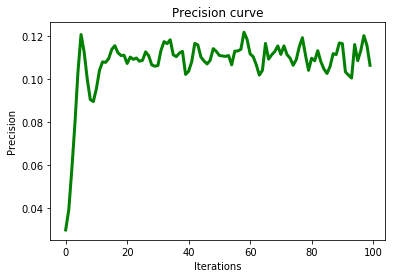

In [6]:
from cdae import *
hidden_size = 50        #隐层节点数目，即用户的嵌入空间维度
lamda_regularizer = 1e-2 #正则项系数
learning_rate = 0.01  #学习率
dropout_rate = 0.5        # dropout rate 
model = cdae(users_num = users_num,
             items_num = items_num,
             hidden_size = hidden_size,
             batch_size = batch_size,
             learning_rate = learning_rate,
             lamda_regularizer = lamda_regularizer,
             dropout_rate = dropout_rate)

user_array = np.array([u for u in range(users_num)])
input_data = np.c_[user_array, train_mat]
records_list = []
for epoch in range(epoches):
    data_mat = np.random.permutation(input_data) 
    loss = model.train(data_mat=data_mat)
    pred_mat = model.predict_ratings(data_mat=np.c_[user_array, train_mat])
    mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')

- 基于商品

epoch:0  loss=30.6456; 
 MAE=1.1528; RMSE=1.4126; Recall=0.0286; Precision=0.0607
epoch:10  loss=8.8364; 
 MAE=2.9487; RMSE=3.1787; Recall=0.0718; Precision=0.1523
epoch:20  loss=8.4066; 
 MAE=2.9410; RMSE=3.1654; Recall=0.0679; Precision=0.1440
epoch:30  loss=8.3898; 
 MAE=2.9433; RMSE=3.1682; Recall=0.0707; Precision=0.1498
epoch:40  loss=8.4326; 
 MAE=2.9805; RMSE=3.2107; Recall=0.0752; Precision=0.1595
epoch:50  loss=8.7010; 
 MAE=2.9118; RMSE=3.1399; Recall=0.0713; Precision=0.1512
epoch:60  loss=8.3283; 
 MAE=2.8974; RMSE=3.1261; Recall=0.0738; Precision=0.1565
epoch:70  loss=8.4597; 
 MAE=2.9556; RMSE=3.1825; Recall=0.0749; Precision=0.1589
epoch:80  loss=8.7155; 
 MAE=2.9404; RMSE=3.1689; Recall=0.0710; Precision=0.1506
epoch:90  loss=8.3943; 
 MAE=2.9304; RMSE=3.1625; Recall=0.0723; Precision=0.1533


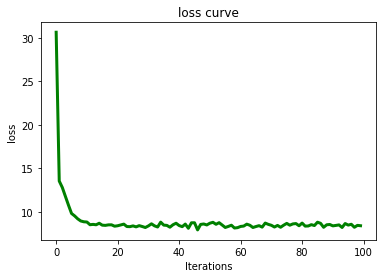

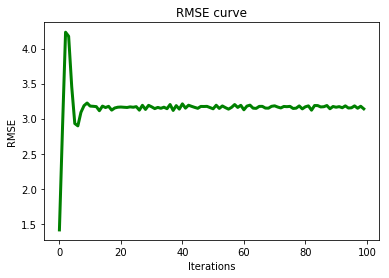

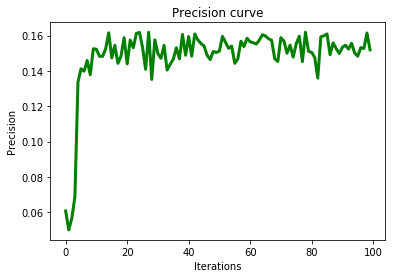

In [7]:
model = cdae(users_num = items_num,
             items_num = users_num,
             hidden_size = hidden_size,
             batch_size = batch_size,
             learning_rate = learning_rate,
             lamda_regularizer = lamda_regularizer,
             dropout_rate = dropout_rate)

item_array = np.array([i for i in range(items_num)])
input_data = np.c_[item_array, train_mat.T]
records_list = []
for epoch in range(epoches):
    data_mat = np.random.permutation(input_data) 
    loss = model.train(data_mat=data_mat)
    pred_mat = model.predict_ratings(data_mat=np.c_[item_array, train_mat.T])
    mae, rmse, recall, precision = evaluation(pred_mat.T, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')